<a href="https://colab.research.google.com/github/imajdadi/GenAiMachineBootcamp/blob/main/GenAiMachineBootcamp/Week5/Day1/DailyCh/Day1W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests beautifulsoup4 nltk spacy

In [2]:
import requests
import re
import nltk
import spacy
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk

In [12]:
# Téléchargement des ressources NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxen

True

In [4]:
# Charger le modèle spaCy
#nlp = spacy.load("en_core_web_sm")

# URLs des livres de Lewis Carroll
urls = [
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/11/pg11.txt"
]

In [5]:
# Fonction pour charger et nettoyer les textes
def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        if response.status_code == 200:
            text = response.text

            # Suppression des caractères spéciaux avec regex
            text = re.sub(r'[^A-Za-z0-9\s]', '', text)

            # Trouver le début et la fin du texte
            start_index = text.find(' START')
            end_index = text.find('*** END')
            if start_index != -1 and end_index != -1:
                text = text[start_index:end_index]

            corpus.append(text)
        else:
            print(f"Échec du chargement de {url}")
    return corpus
# Charger et nettoyer les textes
corpus = load_texts(urls)

# Afficher les 200 premiers caractères de chaque livre
for i, text in enumerate(corpus):
    print(f"\nLivre {i+1} - 200 premiers caractères :\n{text[:200]}\n")


Livre 1 - 200 premiers caractères :
The Project Gutenberg eBook of A Tangled Tale
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
wh


Livre 2 - 200 premiers caractères :
The Project Gutenberg eBook of Through the LookingGlass
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restri


Livre 3 - 200 premiers caractères :
The Project Gutenberg eBook of Alices Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no



In [6]:
# Tokenisation
tokenized_texts = [word_tokenize(text) for text in corpus]

# Afficher les 150 premiers tokens de chaque livre
for i, tokens in enumerate(tokenized_texts):
    print(f"\nLivre {i+1} - 150 premiers tokens :\n{tokens[:150]}\n")

# Suppression des stopwords avec NLTK
stop_words = set(stopwords.words("english"))
filtered_texts = [[word for word in tokens if word.lower() not in stop_words] for tokens in tokenized_texts]

# Vérification de la suppression des stopwords
stopwords_check = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']
for i, filtered_tokens in enumerate(filtered_texts):
    print(f"\nLivre {i+1} - Vérification des mots vides :")
    for word in stopwords_check:
        print(f"{word}: {filtered_tokens.count(word)} occurrences après suppression.")

for i, tokens in enumerate(filtered_texts):
    print(f"\nLivre {i+1} - 10 premiers tokens filtrés:\n{tokens[:10]}")



Livre 1 - 150 premiers tokens :
['The', 'Project', 'Gutenberg', 'eBook', 'of', 'A', 'Tangled', 'Tale', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'wwwgutenbergorg', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', 'Title', 'A', 'Tangled', 'Tale', 'Author', 'Lewis', 'Carroll', 'Illustrator', 'A', 'B', 'Frost', 'Release', 'date', 'June', '5', '2009', 'eBook', '29042', 'Most', 'recently', 'updated', 'January', '5', '2021', 'Lang

In [7]:
# Stemming avec PorterStemmer
stemmer = PorterStemmer()
stemmed_texts = [[stemmer.stem(word) for word in tokens] for tokens in filtered_texts]

# Afficher les 50 premiers mots stemmés
for i, stemmed_tokens in enumerate(stemmed_texts):
    print(f"\nLivre {i+1} - 50 premiers mots stemmés :\n{stemmed_tokens[:50]}\n")


Livre 1 - 50 premiers mots stemmés :
['project', 'gutenberg', 'ebook', 'tangl', 'tale', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'reus', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'wwwgutenbergorg', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'tangl', 'tale', 'author', 'lewi', 'carrol', 'illustr', 'b', 'frost', 'releas', 'date']


Livre 2 - 50 premiers mots stemmés :
['project', 'gutenberg', 'ebook', 'lookingglass', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'reus', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'wwwgutenbergorg', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'lookingglass', 'author', 'lewi', 'carrol', 'releas', 'date', 'june', '25', '2008'

In [8]:
#load spacy's English language model
spacy.cli.download("en_core_web_sm")  # Télécharge le modèle
nlp = spacy.load('en_core_web_sm')
#Lemmatisation avec spaCy
lemmatized_texts = [[token.lemma_ for token in nlp(" ".join(tokens))] for tokens in filtered_texts]

# Afficher les 50 premiers mots lemmatisés
for i, lemmatized_tokens in enumerate(lemmatized_texts):
    print(f"\nLivre {i+1} - 50 premiers mots lemmatisés :\n{lemmatized_tokens[:50]}\n")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Livre 1 - 50 premiers mots lemmatisés :
['Project', 'Gutenberg', 'eBook', 'tangle', 'Tale', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'term', 'Project', 'Gutenberg', 'License', 'include', 'ebook', 'online', 'wwwgutenbergorg', 'locate', 'United', 'States', 'check', 'law', 'country', 'locate', 'use', 'eBook', 'Title', 'tangle', 'Tale', 'Author', 'Lewis', 'Carroll', 'Illustrator', 'B', 'Frost', 'Release', 'date']


Livre 2 - 50 premiers mots lemmatisés :
['Project', 'Gutenberg', 'eBook', 'LookingGlass', 'ebook', 'use', 'anyone', 'anywhere',

In [13]:
# Reconnaissance des entités nommées avec NLTK

# POS tagging avec NLTK
pos_tagged_texts = [pos_tag(tokens) for tokens in filtered_texts]

# Afficher les 20 premiers mots avec leurs tags grammaticaux
for i, pos_tokens in enumerate(pos_tagged_texts):
    print(f"\nLivre {i+1} - 20 premiers mots avec POS tagging :\n{pos_tokens[:20]}\n")

# Reconnaissance des entités nommées avec NLTK
ner_texts = [ne_chunk(pos_tokens) for pos_tokens in pos_tagged_texts]

# Afficher les 10 premières entités nommées de chaque livre
for i, ner_tree in enumerate(ner_texts):
    print(f"\nLivre {i+1} - 10 premières entités nommées :")
    for subtree in ner_tree:
        if hasattr(subtree, 'label'):
            print(f"{subtree.label()}: {' '.join(c[0] for c in subtree)}")
            if len(subtree) > 10:
                break


Livre 1 - 20 premiers mots avec POS tagging :
[('Project', 'NNP'), ('Gutenberg', 'NNP'), ('eBook', 'NN'), ('Tangled', 'NNP'), ('Tale', 'NNP'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('United', 'NNP'), ('States', 'NNPS'), ('parts', 'NNS'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'VBP'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB')]


Livre 2 - 20 premiers mots avec POS tagging :
[('Project', 'NNP'), ('Gutenberg', 'NNP'), ('eBook', 'VB'), ('LookingGlass', 'NNP'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('United', 'NNP'), ('States', 'NNPS'), ('parts', 'NNS'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'VBP'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB'), ('away', 'RP')]


Livre 3 - 20 premiers mots avec POS tagging :
[('Project', 'NNP'), ('Gutenberg', 'NNP'), ('eBook', 'NN'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderlan

In [14]:
pip install wordcloud matplotlib

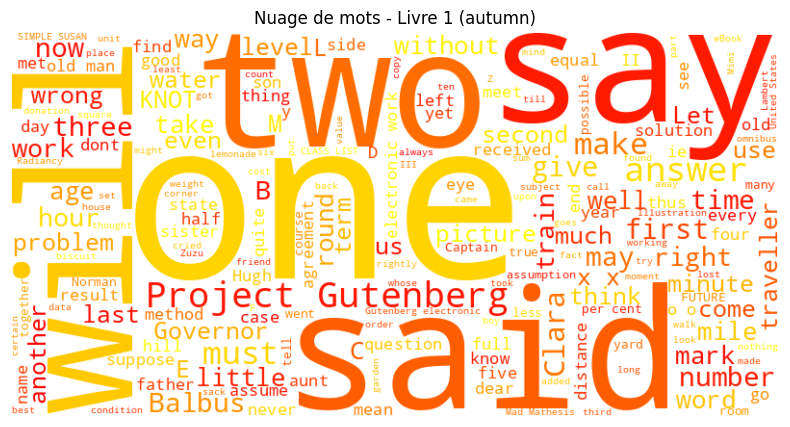

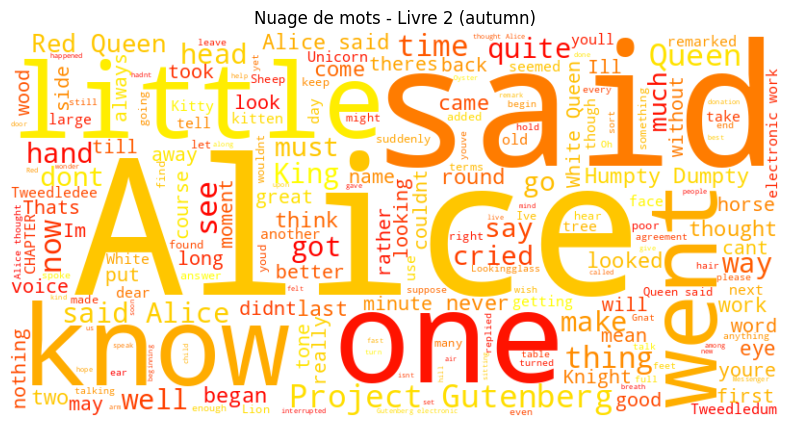

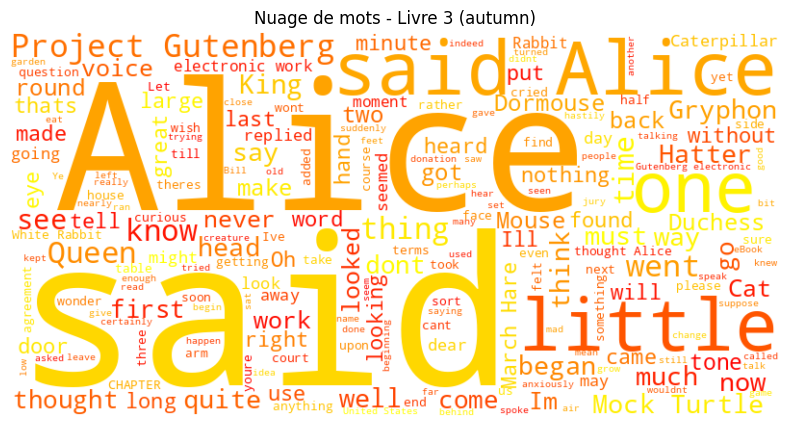

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

colormaps = ["autumn"]

# Générer et afficher un nuage de mots pour chaque livre
for i, text in enumerate(corpus):
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=colormaps[i % len(colormaps)]).generate(text)

    # Affichage du nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Supprimer les axes
    plt.title(f"Nuage de mots - Livre {i+1} ({colormaps[i % len(colormaps)]})")
    plt.show()


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Convertir les textes lemmatisés en une seule liste de phrases
lemmatized_texts_joined = [" ".join(tokens) for tokens in lemmatized_texts]

# Initialiser CountVectorizer (exclut les stopwords)
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(lemmatized_texts_joined)

# Récupérer les mots et leurs fréquences
word_freq = np.asarray(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

# Trier et afficher les 5 mots les plus fréquents
sorted_indices = word_freq.argsort()[::-1]  # Tri décroissant
top_words = [(words[i], word_freq[i]) for i in sorted_indices[:5]]

print("5 mots les plus fréquents :", top_words)

5 mots les plus fréquents : [('say', 1298), ('alice', 833), ('little', 293), ('think', 280), ('know', 278)]


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Convertir les textes lemmatisés en une seule liste de phrases
lemmatized_texts_joined = [" ".join(tokens) for tokens in lemmatized_texts]

# Initialiser le CountVectorizer (avec suppression des stopwords)
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(lemmatized_texts_joined)

# Récupérer la liste des mots
words = vectorizer.get_feature_names_out()

# Convertir la matrice BoW en un DataFrame pour une meilleure lisibilité
df_bow = pd.DataFrame(X.toarray(), columns=words, index=[f"Livre {i+1}" for i in range(len(lemmatized_texts))])

# Afficher le BoW sous forme de tableau
print("Matrice BoW (Bag of Words) :\n", df_bow)

# Trouver le mot le plus fréquent
word_freq = np.asarray(X.sum(axis=0)).flatten()
sorted_indices = word_freq.argsort()[::-1]  # Tri décroissant

# Prendre le mot le plus fréquent
top_word_index = sorted_indices[0]
top_word = words[top_word_index]
top_word_count = word_freq[top_word_index]

# Identifier dans quel document ce mot apparaît le plus
doc_index = X[:, top_word_index].argmax()  # Trouver l'index du document où il apparaît le plus

print(f"\nMot le plus fréquent : '{top_word}'")
print(f"Trouvé {top_word_count} fois au total")
print(f"Document le plus concerné : Livre {doc_index + 1}")
print(f"Index dans la matrice : {top_word_index}")


Matrice BoW (Bag of Words) :
          10  100  100000l  10000l  1000l  102  106  108  10inch  10z  ...  ys  \
Livre 1  25    8        1       1      3    1    1    1       2    1  ...   4   
Livre 2   2    0        0       0      0    0    0    0       0    0  ...   0   
Livre 3   1    0        0       0      0    0    0    0       0    0  ...   0   

         ysmim  zealand  zero  zigzag  zimmermannand  zodone  zs  zuzu  zuzus  
Livre 1      0        0     2       0              1       5   5    11      3  
Livre 2      1        0     0       0              0       0   0     0      0  
Livre 3      0        1     0       1              0       0   0     0      0  

[3 rows x 5955 columns]

Mot le plus fréquent : 'say'
Trouvé 1298 fois au total
Document le plus concerné : Livre 2
Index dans la matrice : 4489


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

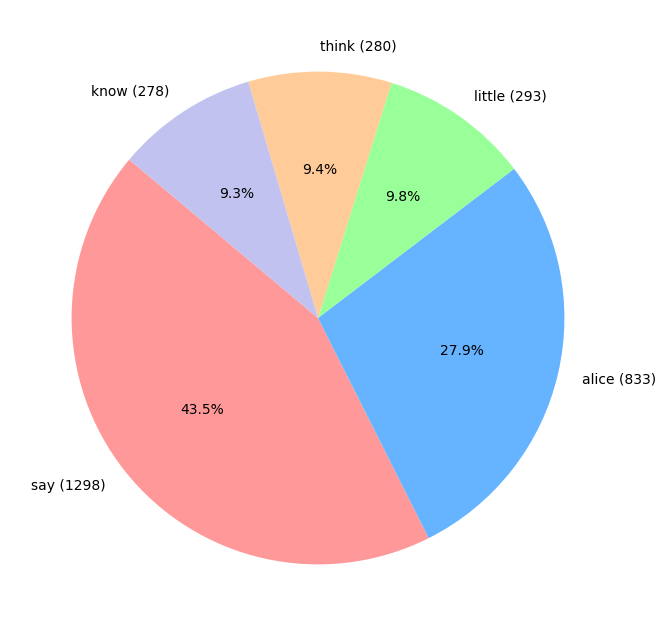

In [26]:
import matplotlib.pyplot as plt

# Sélection des 5 mots les plus fréquents
top_5_indices = sorted_indices[:5]
top_5_words = [words[i] for i in top_5_indices]
top_5_counts = [word_freq[i] for i in top_5_indices]

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_counts,
    labels=[f"{word} ({count})" for word, count in zip(top_5_words, top_5_counts)],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
)

# Ajouter un titre
plt.title


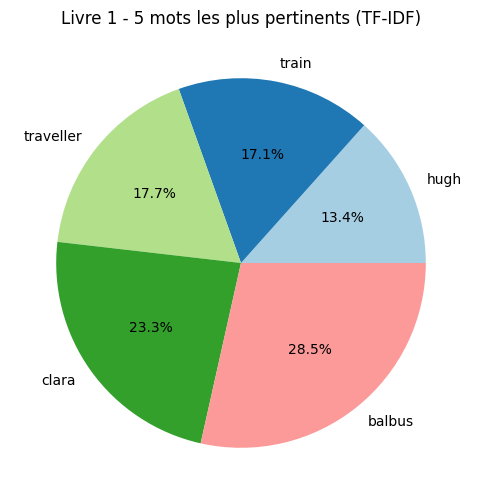

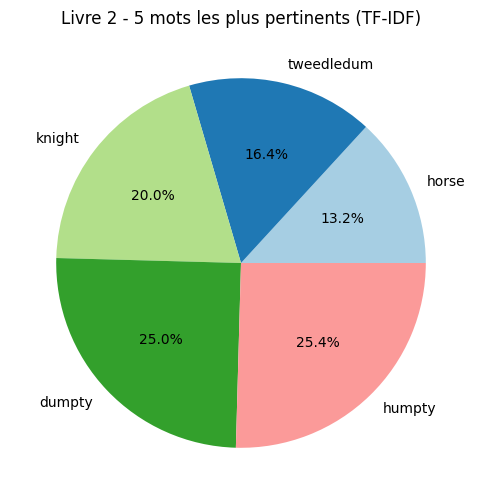

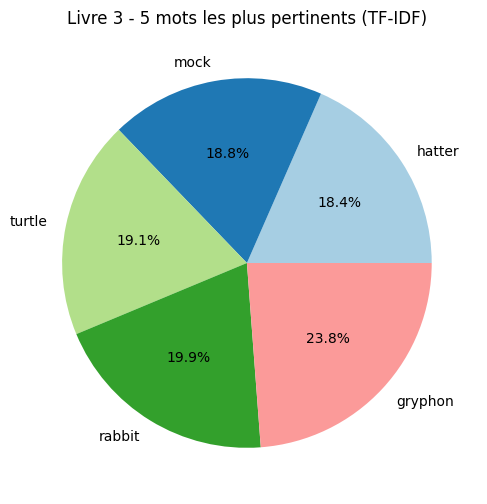

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(min_df=1, max_df=2)
X_tfidf = vectorizer.fit_transform([" ".join(tokens) for tokens in lemmatized_texts])

# Récupérer les mots et scores
feature_names = vectorizer.get_feature_names_out()

def plot_top_tfidf_words(X_tfidf, feature_names, doc_index, num_words=5):
    scores = X_tfidf[doc_index].toarray().flatten()
    top_indices = np.argsort(scores)[-num_words:]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [scores[i] for i in top_indices]

    # Affichage du diagramme circulaire
    plt.figure(figsize=(6, 6))
    plt.pie(top_scores, labels=top_words, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f"Livre {doc_index + 1} - 5 mots les plus pertinents (TF-IDF)")
    plt.show()

# Générer les diagrammes pour chaque livre
for i in range(len(corpus)):
    plot_top_tfidf_words(X_tfidf, feature_names, i)